# Lab 5: Interpolating Polynomials

Welcome to Lab 05! Throughout the course you will complete a lab assignments like this one. You can't learn technical subjects without hands-on practice, so labs are an important part of the course.

Collaborating on labs is more than okay -- it's encouraged. You should rarely remain stuck for more than a few minutes on questions in labs, so ask a neighbor or an instructor for help. Explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it. You should **not** just copy/paste someone else's code, but rather work together to gain understanding of the task you need to complete. 

In today's lab, you'll learn:

- How to find divided differences

- How to use divided differences to write an interpolating polynomial

- Start to think about the error associated with an interpolating polynomial


To receive credit for a lab, answer all questions correctly and submit before the deadline.

**Due Date:** Monday, March 18, 2024 at 4:59 pm

**Collaboration Policy:** Labs are a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others **please include their names below**.

**Collaborators:** 

List collaborators here.

In [ ]:
help recieved from TA (Keyan Miao)

## 0. Review function plotting

Duplicated below is example code below from a previous lab to graph a function. It's here simply for your reference. You should run both cells so you have numpy & matplotlib available for later use.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

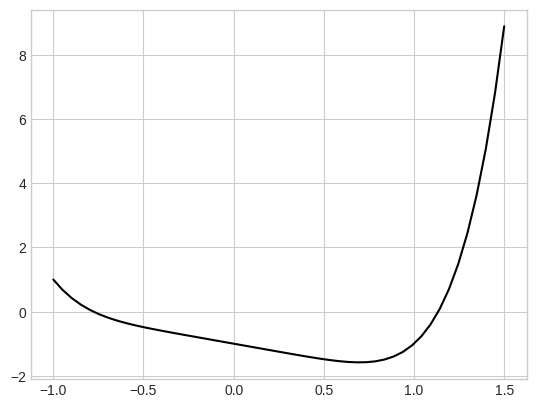

In [3]:
x = np.linspace(-1,1.5,50)
f = lambda x: x**6-x-1
plt.plot(x, f(x), color = 'black', ms = 3);

### Plotting the example from class

Let's plot the 3 points and interpolating polynomial from Monday's class. Remember that was the quadratic function that passes through the points $(-1,6)$, $(1,-2)$, and $(2,3)$. When simplified, the interpolating polynomial is $P_2(x)=3x^2-4x-1$.

**Question 1.** Use matplotlib to plot these three points and the degree-2 interpolating polynomial.

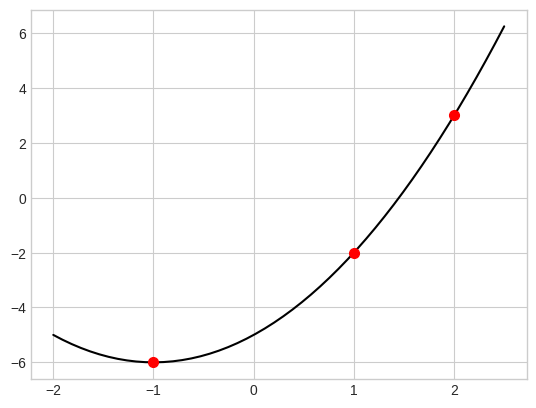

In [19]:
x=np.linspace(-2, 2.5, 50)
f = lambda x: 3*x**2 - 4*x -1
point_x = [-1,1,2]
point_y = [-6,-2, 3]
coefficients = np.polyfit(point_x, point_y, 2)
poly = np.poly1d(coefficients)
plt.plot(x, poly(x), color = 'black')
plt.plot(point_x, point_y, color = 'red', ms = 7, linestyle = 'none', marker = 'o');

## 1. Divided Differences

So far we have learned how to use divided differences to write an interpolating polynomial. (Soon we'll also learn another method.) Thus, let's first review what divided differences are.

Remember for a function $f(x)$ and a set of interpolating points $(x_0,f(x_0)) ... (x_n,f(x_n))$, we define the **first-order divided difference** as $$f[x_0,x_1]=\frac{f(x_1)-f(x_0)}{x_1-x_0}$$

We can define higher-order divided differences using lower-order divided differences. For example, the **2nd-order divided difference** is $$f[x_0,x_1,x_2]=\frac{f[x_1,x_2]-f[x_0,x_1]}{x_2-x_0}$$  And in general, we have the **nth-order divided difference**: $$f[x_0,\ldots,x_n]=\frac{f[x_1,\ldots,x_n]-f[x_0,\ldots,x_{n-1}]}{x_n-x_0}$$

**Note**: Though we usually select $x_k$'s "in order" (i.e. $x_0<x_1<\ldots<x_n$), there is no requirement that this be the case. The value of the nth-order divided difference is independent of the ordering of the $x_k$'s. Furthermore, though it's also often convenient to have the $x_k$'s equally-spaced, this is not a requirement either.

When computing divided differences, it's helpful to organize them in a table. Thus for the rest of this lab, feel free to use any "resource" you desire - i.e. you're not required to write code! To make the table in Question 2, for example, you may choose to write code, use a spreadsheet (Excel or Google-sheets), OR use good ol' fashioned paper. If your solution involves resources you can't easily put in this notebook (for example a spreadsheet or hand-written work), put your work in a google doc/sheet and put a link to that resource in this notebook.

### Scenario

Suppose the expected lifetime of an industrial fan when operated at the listed temperature is shown in the table below.
```
temp(degC) hrs(x1000)
25         95
40         75
50         63
60         54
```
**Question 2.** Construct a table of finite differences for this data. More specifically, find the 3 first-order differences through each pair of adjacent points. Then find 2 2nd-order differences: one through the first 3 points, then another through the second 3 points. Finally, find the 3rd-order divided difference through all 4 points. Organize these divided differences in an easy-to-read table. (By "easy-to-read", more specifically I mean put the temps in a column, hours in a column to the right of that, then first-order divided differences in a column to the right of hours, etc.)

**Note**: You are **strongly** encouraged to check your solution to Q2 with one or more neighbors before proceeding - if your divided differences are incorrect, you'll likely not be able to write correct interpolating polynomials for Q3 and Q4.


In [6]:
temp = [25,40,50,60]
hrs = [95,75,63,54]
first_order = []
second_order = []
for i in range(0,3,1):
    first_order.append((hrs[i+1] - hrs[i])/(temp[i+1] - temp[i]))
print(first_order)
for j in range (0,2,1):
    second_order.append((first_order[j+1] - first_order[j])/(temp[j+2] - temp[j]))
print(second_order)
third_order = [(second_order[1] - second_order[0])/(temp[3] - temp[0])]
print(third_order)

[-1.3333333333333333, -1.2, -0.9]
[0.005333333333333332, 0.014999999999999996]
[0.0002761904761904761]


In [ ]:
#use this cell if you need a non-code block for your solution to Q2, for example if you have a link to a google-doc*

temp(degC) hrs(x1000)    first-order     second-order     third-rder
25         95            -1.3            0.0053           0.0002761904761904761
40         75            -1.2            0.0150
50         63            -0.9
60         54

Remember we can use entries from our divided differences table to easily write an interpolating polynomial. For example, we can write $P_1$, the degree-1 interpolating polynomial as $$P_1(x)=f(x_0)+f[x_0,x_1](x-x_0)$$
and the degree-2 interpolating polynomial, $P_2$, as
$$P_2(x)=f(x_0)+f[x_0,x_1](x-x_0)+f[x_0,x_1,x_2](x-x_0)(x-x_1)$$
In general, we have
$$P_n(x)=P_{n-1}(x)+f[x_0,\ldots,x_n](x-x_0)\cdots (x-x_{n-1})$$


**Question 3.** Use the values from your divided differences table (from Question 2) to write a degree-2 interpolating polynomial (let's call it $P_2$) that passes through the _first 3 points_. Use this polynomial to estimate the lifetime of the fan with an operating temperature of 70 degrees. (**Note**: Again, feel free to use whatever resource/ method you desire, whether it be write code, use a spreadsheet, or simply working out the polynomial "on paper" and recording your result here.)

In [ ]:
[x_0, x_1, x_2] = [25, 40,50]
P_2(x) = f(x_0) + f[x_0, x_1](x - x_0) + f[x_0, x_1, x_2](x-x_0)(x- x_1)
P_2(x) = 95 + -4/3(x-25) + 2/375(x-25)(x-40)
P_2(70) = 42.2

**Question 4.** Repeat Question 3 above, except write a *degree-3* interpolating polynomial (let's call it $P_3$) that passes through all 4 points. Then use this polynomial to estimate the lifetime of the fan with an operating temperature of 70 degrees.

In [6]:
P_3(x) = P_2(x) + f[x_0, x_1, x_2, x_3](x - x_0)(x - x_0)(x - x_1)(x - x_2)
P_3(x) = 95 + -1.3333333(x-25) + 0.0053333333(x-25)(x-40) + 0.000276190(x-25)(x-40)(x-50)
P_3(x) = 49.657

## 2. Looking at the error between a function and its interpolating polynomial

Next we're going to select some points from the function $f(x)=\frac{1}{1+x}$ on the interval $[0,2]$, build an interpolating polynomial, and look at the error between $f$ and the polynomial.

**Question 5.** Use three equally-spaced interpolating points that span the interval $[0,2]$ to write a degree-2 interpolating polynomial, $P_2(x)$. (Thus, you should use the $x$-coordinates 0, 1, and 2.)

Then make a graph of $f$, $P_2$, and the 3 interpolating points. You may use matplotlib or another graphing utility if you desire.


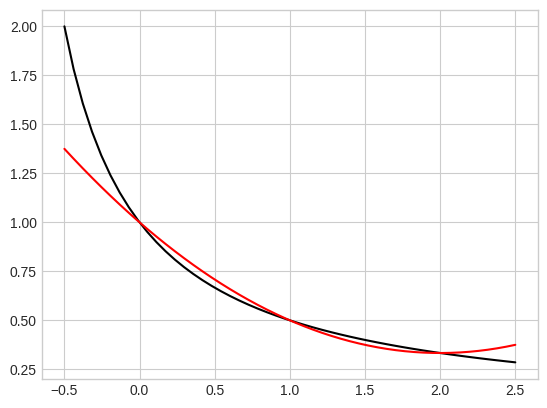

In [15]:
x = np.linspace(-0.5, 2.5, 50)
f = lambda x: 1/(1+x)
g = lambda x: 1 - 0.5*(x) + 0.16666667*(x)*(x-1)
plt.plot(x, f(x), color = 'black', ms = 3);
plt.plot(x, g(x), color = 'red', ms = 3);

*#use this cell if you need a non-code block for your solution to Q5*

**Question 6.** Make a graph of the error function $f(x)-P_2(x)$. What is the largest value of the magnitude of the error on the interval $[0,2]$?


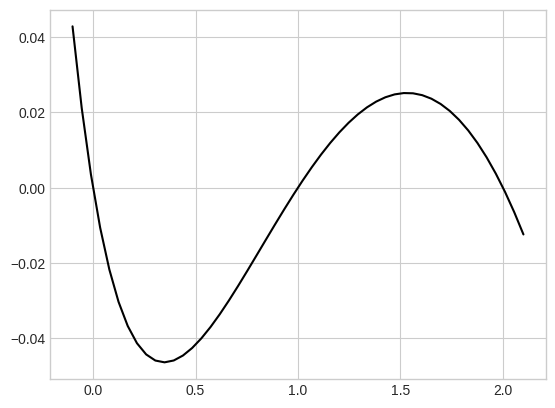

In [21]:
x = np.linspace(-0.1,2.1,50)
f = lambda x: 1/(1+x)
g = lambda x: 1 - 0.5*(x) + 0.16666667*(x)*(x-1)
plt.plot(x, f(x) - g(x), color = 'black', ms = 3);

max error looks like about 0.045

**Question 7.** Repeat questions 5 and 6 for $P_4$, the degree-4 interpolating polynomial. (Use 5 equally-spaced interpolating points over the same interval.)

[-0.6666666666666667, 0.3333333333333335, -0.13333333333333344, 0.04444444444444447]


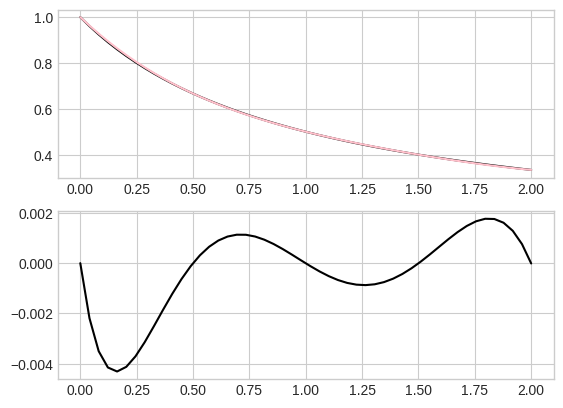

In [18]:
f = lambda x: 1/(1+x)
x = np.linspace(0,2,50)
xs = np.linspace(0,2,5)
def interpolating(x,y,n):
    poly = f(xs)
    coefficients = []
    nth_order = []
    for j in range(1,n,1):
        for i in range(0,len(poly)-1,1):
            nth_order.append((poly[i+1]-poly[i])/(xs[i+j]-xs[i]))
        poly = nth_order
        coefficients.append(nth_order[0])
        nth_order = []
    return coefficients
print(interpolating(x,xs, 5))
g = lambda x: 1 - 0.66666*(x) + 0.33333*(x)*(x-0.5) - 0.13333*(x)*(x-0.5)*(x-1) + 0.044444*(x)*(x-0.5)*(x-1)*(x-1.5)
fig, ax = plt.subplots(2)
ax[0].plot(x, f(x), color = 'black', ms = 4);
ax[0].plot(x, g(x), color = 'pink', ms = 4);
ax[1].plot(x, f(x) - g(x), color = 'black', ms = 4);

*#use this cell if you need a non-code block for your solution to Q7*

**Question 8.** Comment briefly on what you observed in the error between $f$ and each of the 2 interpolating polynomials, $P_2$ and $P_4$.

max error between f and P_4 is smaller (around 0.004) than max error between f and P_2 which is around 0.044)

## 3. Submitting your work
You're done with Lab 05! Submit your work by doing the following:

* Save your notebook

* Restart the kernel and run all cells.

* Right-click the `lab05` file in the navigation pane, then click "download."

* Upload the file you just downloaded to the Lab 05 assignment to Gradescope for Grading.

* If you have included any links to google-docs/sheets, be sure permissions are set correctly so that I can open them.